In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv")

In [34]:
df.head(2)

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53


The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.

In [55]:
east_africa_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']
filtered_df = df[df['country'].isin(east_africa_countries)]

average_co2= pd.DataFrame(filtered_df.groupby('food_category')['co2_emmission'].mean())
df2=average_co2.reset_index()

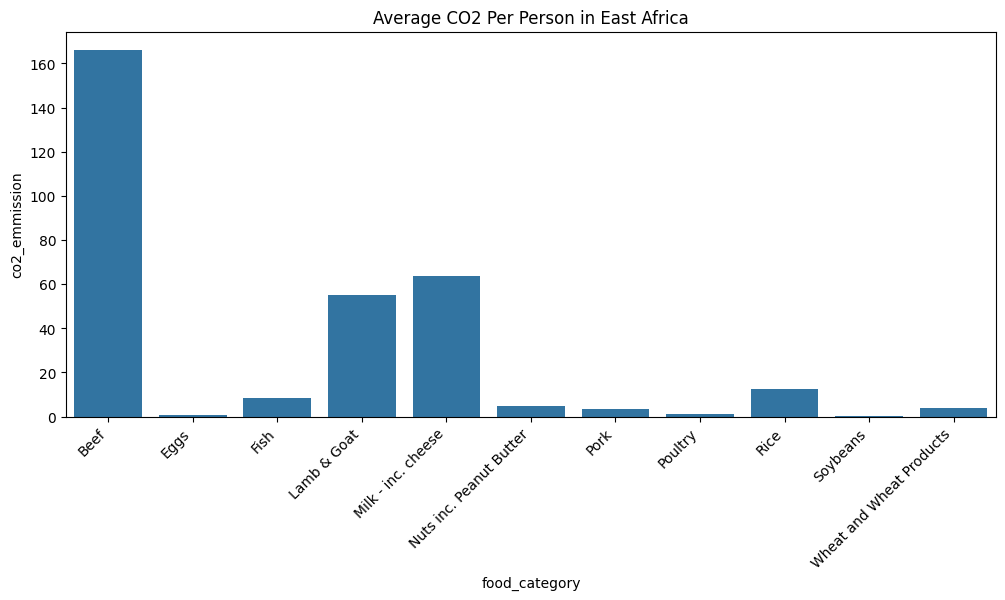

In [57]:
plt.figure(figsize=(12, 5))
sns.barplot(data=df2, x='food_category', y='co2_emmission')
plt.title("Average CO2 Per Person in East Africa")
plt.xticks(rotation=45, ha='right')
plt.show()


In [59]:
sns.barplot(df2, x='food_category', y='co2_emmission', hue='country', palette='turbo')
plt.title("Average CO2 Emissions Per Food Category and Country")
plt.xticks(rotation=45)

plt.show()


ValueError: Could not interpret value `country` for `hue`. An entry with this name does not appear in `data`.

Highlight the marked difference between consumption and emissions in certain food product of your choice

In [25]:
plant_based = ['Rice', 'Wheat and Wheat products', 'Soyabeans', 'Nuts inc. Peanut Butter']
filtered_df = df[df['food_category'].isin(plant_based)]

plant_data = filtered_df[filtered_df['food_category'].isin(plant_based)].copy()
plant_data['Difference'] = plant_data['consumption'] - plant_data['co2_emmission']

plant_data

,country,food_category,consumption,co2_emmission,Difference
8,Argentina,Rice,8.77,11.22,-2.45
10,Argentina,Nuts inc. Peanut Butter,0.49,0.87,-0.38
19,Australia,Rice,11.03,14.12,-3.09
21,Australia,Nuts inc. Peanut Butter,8.73,15.45,-6.72
30,Albania,Rice,7.78,9.96,-2.18
...,...,...,...,...,...
1407,Indonesia,Nuts inc. Peanut Butter,4.92,8.71,-3.79
1416,Liberia,Rice,94.75,121.25,-26.50
1418,Liberia,Nuts inc. Peanut Butter,1.31,2.32,-1.01
1427,Bangladesh,Rice,171.73,219.76,-48.03


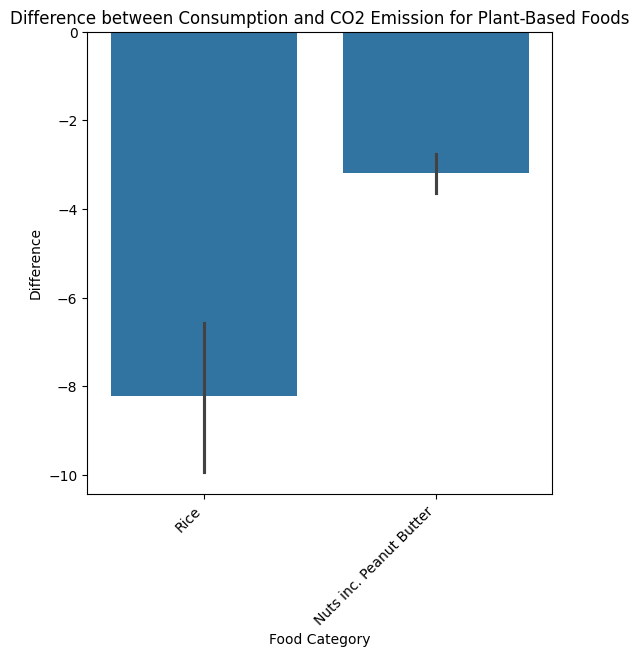

In [33]:
plt.figure(figsize=(6, 6))
sns.barplot(data=plant_data, x='food_category', y='Difference')
plt.title('Difference between Consumption and CO2 Emission for Plant-Based Foods')
plt.xlabel('Food Category')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.show()



The food consumption of animal and non-animal products and the impact on carbon footprint.

A box plot and interpretation of the CO2 contributions of food levels

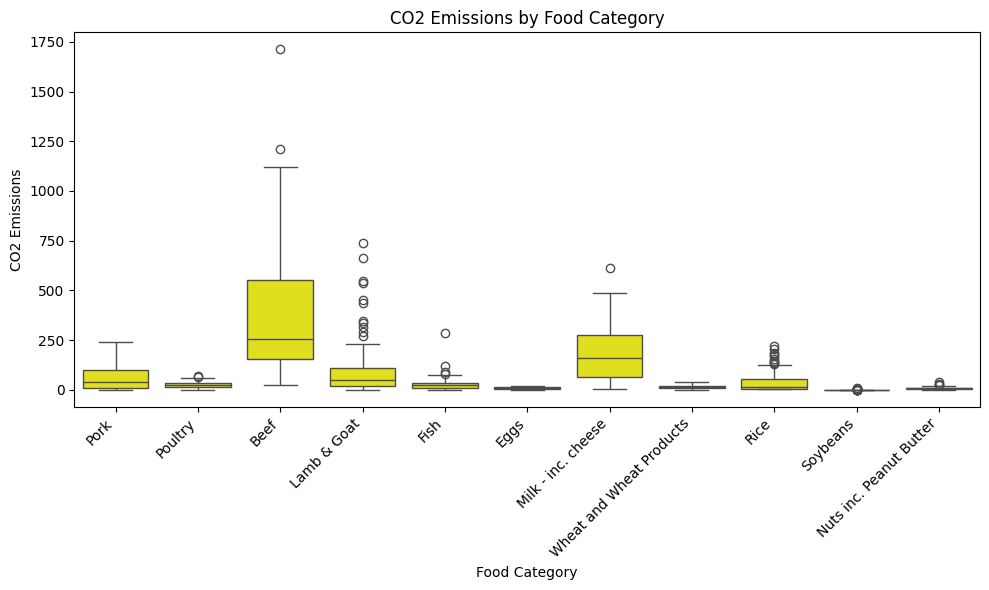

In [68]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="food_category", y="co2_emmission", data=df,color='yellow')
plt.title('CO2 Emissions by Food Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('CO2 Emissions')
plt.xlabel('Food Category')
plt.tight_layout()
plt.show()


In [60]:
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [63]:
filtereddf=df[df['co2_emmission']<500]

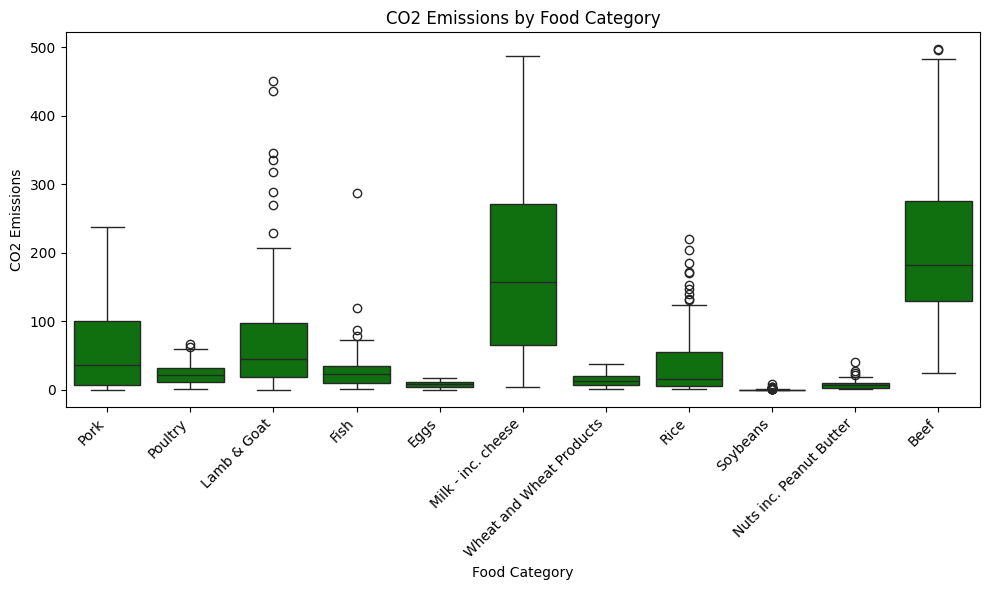

In [67]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="food_category", y="co2_emmission", data=filtereddf,color='green')
plt.title('CO2 Emissions by Food Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('CO2 Emissions')
plt.xlabel('Food Category')
plt.tight_layout()
plt.show()

Top 10 Countries with highest emissions.

In [66]:
sorted_data = df.sort_values(by='co2_emmission', ascending=False)
sorted_data.head(10)

,country,food_category,consumption,co2_emmission
2,Argentina,Beef,55.48,1712.00
90,Brazil,Beef,39.25,1211.17
57,USA,Beef,36.24,1118.29
13,Australia,Beef,33.86,1044.85
123,Bermuda,Beef,33.15,1022.94
222,French Polynesia,Beef,30.90,953.51
189,Canada,Beef,30.25,933.45
79,Luxembourg,Beef,29.88,922.03
68,Uruguay,Beef,29.10,897.96
233,Israel,Beef,28.78,888.09


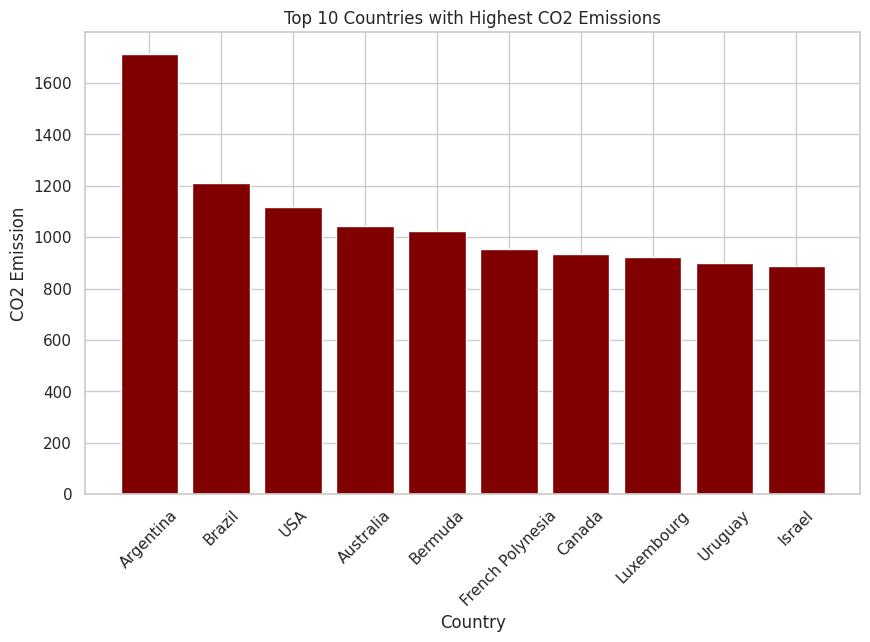

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_data['country'], sorted_data['co2_emmission'], color='maroon')

plt.title("Top 10 Countries with Highest CO2 Emissions")
plt.xlabel("Country")
plt.ylabel("CO2 Emission")

plt.xticks(rotation=45)
plt.show()